<br>

# Técnicas Matemáticas para Big Data - Project 02 - Hidden Markov Models
<br><br>


GROUP 05:
- João Vieitas - Nº 97632 - 33% Work Participation
- Margarida Oliveira - Nº 103112 - 33% Work Participation
- Maria Costa - Nº 124254 - 33% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

O impacto climático nos tempos de entrega de produtos é um desafio significativo para empresas que dependem de um transporte eficiente para garantir a pontualidade. As condições climáticas podem afetar a logística e, consequentemente, atrasar os prazos de entrega. Este estudo tem como objetivo explorar como as condições climáticas influenciam os tempos de entrega e como um Modelo de Markov Oculto (HMM) pode ser utilizado para prever esses impactos de forma precisa. 

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

Conforme mencionado anteriormente, a abordagem adotada neste estudo utiliza o modelo Hidden Markov Model (HMM) para prever os impactos climáticos nos tempos de entrega.

O Modelo Oculto de Markov é uma ferramenta probabilística amplamente utilizada para modelação de processos estocásticos onde o sistema subjacente opera em estados ocultos que não podem ser observados diretamente. No contexto deste estudo, os HMMs são aplicados para identificar padrões ocultos nos atrasos de entregas, condicionados pela variável clima.
Assim, os estados ocultos no nosso modelo representam os diferentes níveis de impacto nos tempos e entrega: Sem Impacto (Normal), Impacto Moderado e Impacto Severo. Estes estados não são diretamente observáveis, mas podem ser inferidos através de variáveis observadas, que no nosso caso são as condições meteorológicas: Sol, Chuva Moderada e Chuva Intensa.
A abordagem segue várias etapas: recolha e organização de dados, construção do modelo HMM, ou seja, estabelecemos as probabilidades de transição entre estados ocultos e de emissão das observações, treino do modelo, análise e previsão.

Desta forma, o HMM permite compreender de forma detalhada a ligação entre as condições meteorológicas e os tempos de entrega, identificar tendências ao longo do tempo e propor estratégias para minimizar atrasos, mesmo em cenários de crescente imprevisibilidade climática.

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

Os atrasos nos sistemas de entrega, representam um problema crítico na gestão logística e na mobilidade moderna. As condições meteorológicas são um dos fatores externos mais significativos para a ocorrência de atrasos, uma vez que estes fenómenos afetam diretamente as operações. A análise e previsão de atrasos devido a fatores climáticos têm ganho relevância nos últimos anos, motivadas por implicações económicas, impactos das alterações climáticas e avanços tecnológicos em métodos de análise de dados.
Assim, O impacto das condições climáticas nos tempos de entrega é um tema amplamente reconhecido na logística e transporte. As alterações climáticas estão a intensificar fenómenos extremos, como chuvas fortes, tempestades e ondas de calor, que afetam diretamente a eficiência das cadeias de abastecimento. Desde atrasos nos transportes rodoviários devido a estradas inundadas até interrupções em portos e aeroportos durante tempestades severas, os desafios logísticos associados ao clima são uma preocupação crescente.

Historicamente, as empresas têm utilizado métodos tradicionais de previsão meteorológica para mitigar riscos, mas estas abordagens limitavam-se à observação básica e ao uso de calendários sazonais. Com o avanço da tecnologia, surgiram sistemas baseados em inteligência artificial e modelagem estatística, como os Modelos Ocultos de Markov (HMMs). Estes métodos são particularmente úteis, pois permitem estimar estados ocultos, como o impacto do clima nos atrasos, a partir de variáveis observáveis, como as condições meteorológicas.

Na literatura, estudos apontam que o uso de HMMs em logística pode prever atrasos com maior precisão ao analisar séries temporais de eventos climáticos e respetivas consequências. Por exemplo, empresas ferroviárias e de transporte rodoviário nos EUA utilizam dados climáticos históricos para adaptar operações em cenários de alto risco climático, reduzindo custos e melhorando a satisfação do cliente. Estas inovações demonstram como métodos analíticos avançados podem tornar a logística mais resiliente perante um clima em mudança.


<br><br>
## 4. About the main method/algorithm used [1,5 valor]

O principal método utilizado neste trabalho é o Modelo de Markov Oculto (HMM - Hidden Markov Model),um modelo estatístico amplamente reconhecido por sua capacidade de lidar com sistemas onde os estados subjacentes não são diretamente observáveis, mas podem ser inferidos a partir de dados visíveis. Este modelo é particularmente útil para capturar relações temporais e probabilísticas entre eventos, sendo amplamente aplicado em áreas como reconhecimento de fala, análise de séries temporais e, mais recentemente, em estudos logísticos relacionados a fatores climáticos.

No contexto deste estudo, as principais características do HMM são:

- Estados Ocultos: Representam os níveis de impacto no tempo de entrega (Normal, Moderado e Severo), que não podem ser diretamente observados.
- Variáveis Observadas: São as condições meteorológicas (Sol, Chuva Moderada e Chuva Intensa), que fornecem pistas sobre os estados ocultos.
- Probabilidades de Transição e Emissão:
    - Transições: A probabilidade de um estado oculto transitar para outro.
    - Emissões: A probabilidade de uma observação ser gerada por um determinado estado oculto.

Vantagens do HMM no Estudo:
- Capacidade de Inferência: Permite inferir o estado oculto atual (impacto no tempo de entrega) com base nas condições meteorológicas observadas.
- Flexibilidade: Adapta-se a sistemas dinâmicos, capturando mudanças de padrão ao longo do tempo.
- Previsão: Pode ser usado para prever atrasos futuros em função de padrões climáticos recorrentes.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries

In [1]:
try:
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt
  import networkx as nx
  from hmmlearn.hmm import CategoricalHMM
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
except:
  !pip install pandas
  !pip install numpy
  !pip install seaborn
  !pip install matplotlib
  !pip install networkx
  !pip install hmmlearn
  !pip install sklearn

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

O dataset utilizado, dataset_hmm_climate_impact.csv, contém duas variáveis principais:

Clima: Representa as condições climáticas observadas, como "Sol", "Chuva Moderada" e "Chuva Intensa".
Impacto no Tempo de Entrega: Classifica o impacto do clima no tempo de entrega em três categorias: "Sem Impacto", "Impacto Moderado" e "Impacto Severo".
Essas variáveis foram mapeadas para valores numéricos para facilitar a modelagem, com o clima mapeado para valores entre 0 e 2 e os impactos também representados por valores numéricos correspondentes.

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

In [2]:
# Carregar os dados
df = pd.read_csv("dataset_hmm_climate_impact.csv")
df.head()

,Clima,Impacto no Tempo de Entrega
0,Chuva Intensa,Impacto Moderado
1,Chuva Intensa,Impacto Moderado
2,Sol,Sem Impacto (Normal)
3,Sol,Sem Impacto (Normal)
4,Chuva Intensa,Impacto Moderado


In [3]:
clima_mapping = {
    "Sol": 0,
    "Chuva Moderada": 1,
    "Chuva Intensa": 2 
}

impacto_mapping = {
    "Sem Impacto (Normal)": 0,
    "Impacto Moderado": 1,
    "Impacto Severo": 2
}

df["Clima_Num"] = df["Clima"].map(clima_mapping)
df["Impacto_Num"] = df["Impacto no Tempo de Entrega"].map(impacto_mapping)

# Separar as observações (X) e estados ocultos (y)
X = df["Clima_Num"].values
y = df["Impacto_Num"].values

df.head()


,Clima,Impacto no Tempo de Entrega,Clima_Num,Impacto_Num
0,Chuva Intensa,Impacto Moderado,2,1
1,Chuva Intensa,Impacto Moderado,2,1
2,Sol,Sem Impacto (Normal),0,0
3,Sol,Sem Impacto (Normal),0,0
4,Chuva Intensa,Impacto Moderado,2,1


In [4]:
initial_states = df["Impacto_Num"]

n_states = 3
start_probabilities = np.zeros(n_states)

for state in initial_states:
    start_probabilities[state] += 1

# Normalizar para obter porbabilidades
start_probabilities /= len(initial_states)

print("Probabilidades Iniciais:", start_probabilities)


Probabilidades Iniciais: [0.4014 0.3616 0.237 ]


Matriz de Transição:
[[0.40378863 0.36390828 0.23230309]
 [0.39214602 0.35951327 0.24834071]
 [0.41181435 0.36033755 0.2278481 ]]


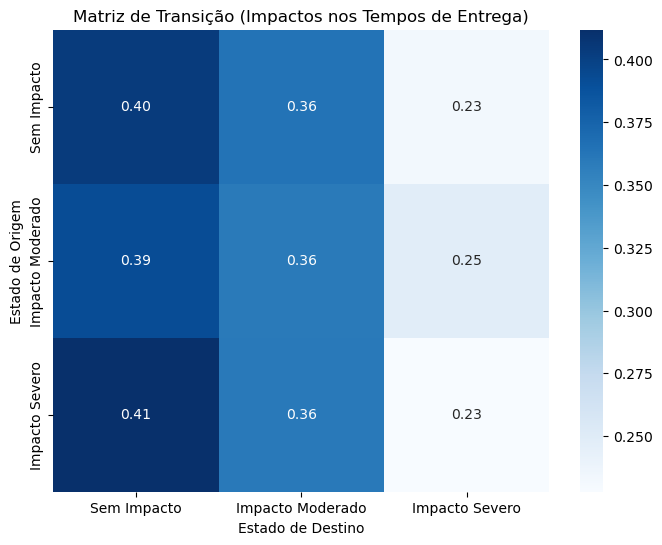

In [5]:
n_states = len(impacto_mapping)  
n_observations = len(clima_mapping)  

# Inicializar matriz de transição
transition_matrix = np.zeros((n_states, n_states))

# Contar frequências de transições entre estados
for i in range(1, len(y)):
    prev_state = y[i - 1]
    curr_state = y[i]
    transition_matrix[prev_state, curr_state] += 1

# Normalizar as frequências para obter probabilidades
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)
print("Matriz de Transição:")
print(transition_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", cbar=True, fmt='.2f', 
            xticklabels=["Sem Impacto", "Impacto Moderado", "Impacto Severo"], 
            yticklabels=["Sem Impacto", "Impacto Moderado", "Impacto Severo"])
plt.title("Matriz de Transição (Impactos nos Tempos de Entrega)")
plt.xlabel("Estado de Destino")
plt.ylabel("Estado de Origem")
plt.show()

Matriz de Emissão:
[[0.73592427 0.26407573 0.        ]
 [0.08019912 0.54701327 0.37278761]
 [0.         0.13924051 0.86075949]]


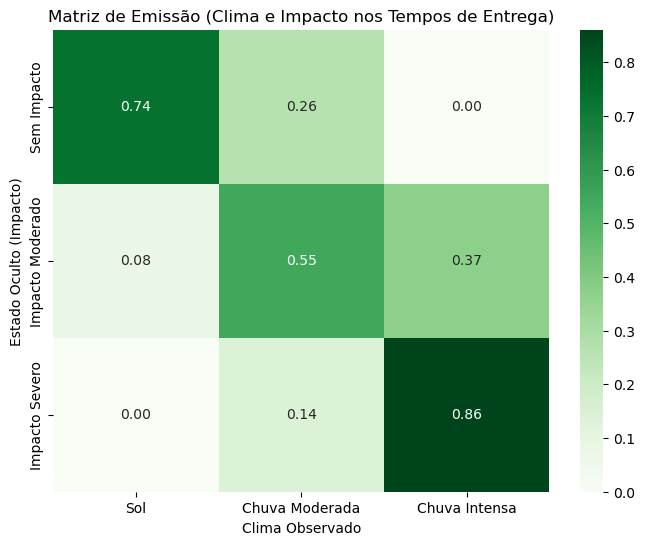

In [6]:
# Inicializar matriz de emissões
emission_matrix = np.zeros((n_states, n_observations))

# Contar frequências para cada par (estado, observação)
for i in range(len(y)):
    state = y[i]
    observation = X[i]
    emission_matrix[state, observation] += 1

# Normalizar as frequências para obter probabilidades
emission_matrix = emission_matrix / emission_matrix.sum(axis=1, keepdims=True)
print("Matriz de Emissão:")
print(emission_matrix)

# Visualização da matriz de emissão
plt.figure(figsize=(8, 6))
sns.heatmap(emission_matrix, annot=True, cmap="Greens", cbar=True, fmt='.2f', 
            xticklabels=["Sol", "Chuva Moderada", "Chuva Intensa"], 
            yticklabels=["Sem Impacto", "Impacto Moderado", "Impacto Severo"])
plt.title("Matriz de Emissão (Clima e Impacto nos Tempos de Entrega)")
plt.xlabel("Clima Observado")
plt.ylabel("Estado Oculto (Impacto)")
plt.show()



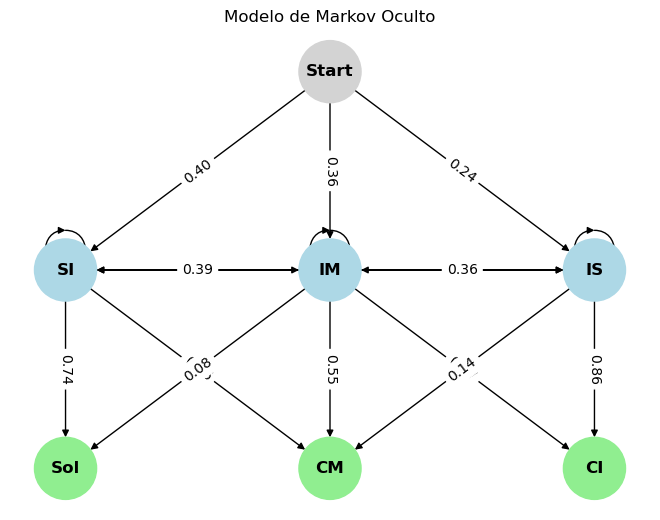

In [7]:
hidden_states = ["SI", "IM", "IS"]
observations = ["Sol", "CM", "CI"]

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar um nó "Start" e conectá-lo aos estados ocultos com as probabilidades de início
G.add_node("Start", layer=-1, color='lightgray')

# Adicionar os estados ocultos ao grafo
for state in hidden_states:
    G.add_node(state, layer=0, color='lightblue')

# Adicionar as observações como nós separados
for obs in observations:
    G.add_node(obs, layer=1, color='lightgreen')

# Criar arestas do nó "Start" para os estados ocultos com as probabilidades de início
for i, state in enumerate(hidden_states):
    weight = start_probabilities[i]
    G.add_edge("Start", state, weight=weight)

# Adicionar arestas de transição entre os estados ocultos
for i, from_state in enumerate(hidden_states):
    for j, to_state in enumerate(hidden_states):
        weight = transition_matrix[i][j]
        if weight > 0:
            G.add_edge(from_state, to_state, weight=weight, style="solid")

# Adicionar arestas de emissão
for i, state in enumerate(hidden_states):
    for j, obs in enumerate(observations):
        weight = emission_matrix[i][j]
        if weight > 0:
            G.add_edge(state, obs, weight=weight, style="dashed")

# Configurar a posição dos nós para visualização
pos = {}
# Colocar o nó "Start" na parte superior
pos["Start"] = (len(hidden_states) / 3, 2)
# Colocar os estados ocultos na linha superior
for i, state in enumerate(hidden_states):
    pos[state] = (i, 1)
# Colocar as observações na linha inferior
for j, obs in enumerate(observations):
    pos[obs] = (j, 0)

# Atributos das arestas
edge_labels = nx.get_edge_attributes(G, "weight")
edge_styles = nx.get_edge_attributes(G, "style")

# Desenhar nós com cores diferentes
node_colors = [G.nodes[node].get('color', 'white') for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', node_size=2000)

# Adicionar rótulos das arestas
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)})

# Título e exibição
plt.title("Modelo de Markov Oculto")
plt.show()

In [8]:
# Divisão  dos dados em treino e teste (80% treino, 20% teste)
X = df['Clima_Num'].values.reshape(-1, 1)  # Variáveis observadas
y = df['Impacto_Num'].values  # Estados ocultos 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resumo das divisões
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 1), (1000, 1), (4000,), (1000,))

In [9]:
# Configurar e treinar o modelo HMM
model = CategoricalHMM(n_components=3, init_params="mc")

# Configurar matrizes no modelo
model.startprob_ = start_probabilities
model.transmat_ = transition_matrix
model.emissionprob_ = emission_matrix

# Treinar o modelo com os dados de treino (apenas observações)
model.fit(X_train)

# Inferir os estados ocultos para o conjunto de treino
predicted_states_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predicted_states_train)

# Inferir os estados ocultos para o conjunto de teste
predicted_states_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, predicted_states_test)

print(f"Accuracy Train: {accuracy_train}")
print(f"Accuracy Test: {accuracy_test}")

Accuracy Train: 0.701
Accuracy Test: 0.681


<br><br>

## 8. Analysis of Example 1 [3,0 valor] 

In [10]:
# Sequência de clima: Sol, Sol, Sol
test_sequence = np.array([0, 0, 0]).reshape(-1, 1)
# Previsão dos estados ocultos para a sequência de teste
predicted_states_example1 = model.predict(test_sequence)
print(predicted_states_example1)

[1 0 0]


A saída do Exemplo 1 foi [1, 0, 0], o que significa que o modelo previu os seguintes impactos para a sequência de clima: Sol, Sol, Sol:

1. Impacto Moderado (1) para o primeiro "Sol".
2. Sem Impacto (0) para o segundo "Sol".
3. Sem Impacto (0) para o terceiro "Sol".

O modelo previu de forma incorreta Impacto Moderado no primeiro dia de "Sol" em vez de prever Sem Impacto (0) para todos os dias. Algumas das razões para isto ter acontecido são:
- O primeiro estado previsto (Impacto Moderado, 1) pode ter sido influenciado pelas probabilidades iniciais do modelo, ou seja, o modelo começa a prever a sequência de estados com base nas probabilidades iniciais que foram calculadas a partir dos dados de treino. Se o estado Impacto Moderado (1) tiver uma probabilidade considerável de ser o estado inicial, o modelo pode ter começado com esse estado, especialmente se o "Sol" tiver alguma probabilidade de ocorrer no estado Impacto Moderado segundo a matriz de emissão.
- Na matriz de emissão, o "Sol" provavelmente tem uma associação forte com o estado Sem Impacto (0), mas não é uma associação exclusiva, ou seja, pode haver uma pequena probabilidade, mas não zero, de o "Sol" estar associado ao estado Impacto Moderado. Isso faz com que o modelo inicie a sequência num estado que não é o mais óbvio ou esperado.
- Após começar no estado Impacto Moderado (1), o modelo provavelmente fez transições para Sem Impacto (0) porque a matriz de transição tem uma alta probabilidade de transitar de Impacto Moderado para Sem Impacto. Como o clima nos dias seguintes também é "Sol", o modelo acaba por ajustar a previsão e acerta nos dias subsequentes.
- Nos dados de treino, pode haver sequências em que o "Sol" está associado a Impacto Moderado em alguns contextos (por exemplo, se o "Sol" aparecer após uma sequência de Chuva Intensa ou Chuva Moderada, o impacto pode ser moderado). Este tipo de sequência, embora não muito comum, pode fazer com que o modelo aprenda a prever Impacto Moderado no início.

Análise da Sequência de Resultados:
1. Primeiro estado (1 - Impacto Moderado):
O modelo começa a previsão com Impacto Moderado devido a uma combinação das probabilidades iniciais e da matriz de emissão que indica que o "Sol" pode, em alguns casos, ser associado a este estado.
2. Segundo e terceiro estados (0 - Sem Impacto):
Após a primeira previsão, a transição do estado Impacto Moderado para Sem Impacto provavelmente tem uma alta probabilidade, e como o "Sol" é muito mais associado a Sem Impacto, o modelo ajusta as previsões subsequentes para este estado.

Em suma, o modelo fez uma previsão incorreta no início devido a uma mistura de fatores, como a probabilidade inicial e as probabilidades de emissão que indicam que o "Sol" pode, em alguns casos, ser observado com Impacto Moderado. No entanto, ao longo da sequência, o modelo ajusta-se e prevê corretamente Sem Impacto (0) para os dias seguintes.

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

In [11]:
# Sequência de clima: Chuva Moderada, Chuva Intensa, Sol
test_sequence = np.array([1, 2, 0]).reshape(-1, 1)  # 1 = "Chuva Moderada", 2 = "Chuva Intensa", 0 = "Sol"
# Previsão dos estados ocultos para a sequência de teste
predicted_states_example2 = model.predict(test_sequence)
print(predicted_states_example2)

[1 2 0]


A saída do Exemplo 2 foi [1, 2, 0], o que significa que o modelo previu os seguintes impactos para a sequência de clima: Sol, Sol, Sol:

1. Impacto Moderado(1) para "Chuva Moderada"
2. Impacto Severo(2) para "Chuva Intensa"
3. Sem Impacto(0) para "Sol"

Esta previsão pode ser boa, pois:
- Chuva Moderada → Impacto Moderado (1):
Para "Chuva Moderada", o modelo previu Impacto Moderado (1), o que faz sentido. Normalmente, a Chuva Moderada está associada a um impacto moderado, o que é uma previsão correta e razoável com base nos dados e nos padrões aprendidos pelo modelo.
- Chuva Intensa → Impacto Severo (2):
A previsão de Impacto Severo (2) para a "Chuva Intensa" também é bastante lógica. Se o modelo aprendeu que Chuva Intensa tende a causar Impactos Severos, então esta previsão está alinhada com uma interpretação correta dos dados.
Em muitos contextos, a Chuva Intensa pode ter um impacto mais significativo, e o modelo parece ter captado esse padrão corretamente.
- Sol → Sem Impacto (0):
Para "Sol", o modelo fez uma previsão acertada de Sem Impacto (0), o que é esperado, dado que Sol tipicamente não está associado a um impacto significativo no contexto dos dados fornecidos.

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

Pros:

- O Modelo Oculto de Markov (HMM) é eficaz em modelar dependências temporais entre observações. No contexto de previsão de Impacto no Tempo de Entrega baseado no Clima, o modelo consegue capturar como o clima de um dia afeta o impacto nos dias seguintes, considerando as transições entre diferentes estados ocultos, como Impacto Moderado e Impacto Severo.
- O HMM permite que o modelo aprenda probabilidades condicionais entre as observações (no caso, o clima) e os estados ocultos (o impacto nos tempos de entrega). Isto é útil para prever o impacto de cada tipo de clima nas operações logísticas.
- O HMM é relativamente fácil de entender e interpretar, especialmente para tarefas como esta, em que o objetivo é modelar transições entre os estados ocultos (Impactos) com base em observações visíveis (Clima). As matrizes de transição e emissão oferecem uma visão clara sobre como o modelo está a tomar as suas decisões.
- Quando o problema envolve um número relativamente pequeno de estados e um padrão simples de transições, o HMM pode ser uma boa solução, com bom desempenho e facilidade de implementação, como mostra o nosso exemplo de previsão de impacto.

Cons:

- O HMM tem dificuldades em lidar com grandes volumes de dados ou modelos muito complexos com muitos estados ocultos. Isso pode levar a problemas de computação e eficiência. Em contextos com mais estados ou variáveis, o modelo pode se tornar muito lento ou difícil de ajustar.
- O HMM assume que o estado atual depende apenas do estado anterior, o que é uma simplificação. Em situações em que há dependências mais complexas no tempo (por exemplo, o impacto do clima em vários dias consecutivos), essa suposição pode não ser válida, e o modelo pode perder informações cruciais.
- Se o comportamento do sistema for não linear ou houver efeitos de longo prazo que não podem ser explicados por uma simples transição de um estado para outro, o HMM pode ser insuficiente. 
- A definição dos estados ocultos pode ser subjetiva e exigir uma interpretação cuidadosa dos dados.
- Embora o HMM seja interpretável, em problemas mais complexos, a interpretação das matrizes de transição e emissão pode tornar-se difícil. Isto ocorre especialmente quando as transições entre estados e as emissões de observações não seguem padrões óbvios.




<br><br>
## 11. Future improvements [2,0 valor]

Embora o modelo de Modelo Oculto de Markov (HMM) tenha mostrado bons resultados na previsão do impacto do clima nos tempos de entrega, existem várias melhorias que podem ser implementadas para otimizar o desempenho do modelo.
Entre as melhorias possíveis, destaca-se a inclusão de mais variáveis no modelo, como dados temporais (hora do dia) e dados de tráfego. Assim, uma primeira melhoria seria a expansão para HMMs de ordem superior, que permitiriam capturar dependências temporais mais complexas, considerando não só o estado anterior, mas também vários estados passados, o que pode ser particularmente útil em sistemas com efeitos de longo prazo. Além disso, a utilização de modelos de redes neurais recorrentes (RNN) ou LSTM pode melhorar significativamente a capacidade do modelo em capturar padrões não lineares e dependências temporais mais longas, superando a limitação do HMM de primeira ordem.

Outra melhoria relevante seria a inclusão de variáveis adicionais para enriquecer o modelo, como temperatura, humidade ou até eventos externos que podem influenciar o impacto no tempo de entrega. A adição dessas features poderia aumentar a precisão das previsões, permitindo que o modelo seja mais robusto.

Por fim, a utilização de modelos alternativos de Cadeias de Markov, como as com observações contínuas, poderia ser explorada para lidar com variáveis contínuas, como a intensidade do clima, que não são bem modeladas por HMMs categóricas. 

Com estas melhorias, o modelo não só ganharia em precisão, mas também em flexibilidade e adaptabilidade, tornando-se uma ferramenta ainda mais poderosa para prever impactos em sistemas complexos.

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>


https://climavision.com/

https://www.ncei.noaa.gov/

https://www.benisonlogistics.com/